In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calendar

In [2]:
df = pd.read_excel('/content/phone_data.xlsx')
df.shape

(338, 8)

In [3]:
df.head()

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0


In [4]:
df.isnull().sum()

Date                       0
Start time                 0
From city                  0
To city                    0
Number called (to/from)    0
Call type                  0
Duration                   0
Grand Total                0
dtype: int64

1.2  Most and least frequent outgoing numbers
  1.  Identify the 3 numbers with the most counts of outgoing calls.

In [5]:
df_maxNum = df[df['Call type']=='Outgoing'].value_counts().groupby('Number called (to/from)').sum().sort_values(ascending=False)
df_val_counts = pd.DataFrame(df_maxNum)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['Number','Max_Count']
df_value_counts_reset.head(3)

,Number,Max_Count
0,A_1,111
1,A_5,48
2,B_3,28


2.  Identify the numbers with the least counts of outgoing calls.  If there are ties (e.g.  1phone call for many numbers) then identify all numbers.

In [6]:
df_min = df[df['Call type']=='Outgoing'].value_counts().groupby('Number called (to/from)').sum().sort_values(ascending=True)
df_val_counts_min = pd.DataFrame(df_min)
df_value_counts_reset_min = df_val_counts_min.reset_index()
df_value_counts_reset_min.columns = ['Number','Min_Count']
df_value_counts_reset_min[:14]

,Number,Min_Count
0,D_1,1
1,F_5,1
2,F_4,1
3,F_3,1
4,F_2,1
5,F_1,1
6,E_5,1
7,E_4,1
8,D_5,1
9,D_2,1


1.3  Highest and lowest total duration of outgoing calls

1.  Repeat the same exercise as in the previous subsection, but with the total duration per number called.

In [7]:
Duration_max = df[df['Call type']=='Outgoing']
Duration_max = Duration_max.groupby(['Number called (to/from)',], as_index=False)['Duration'].sum()
Duration_max = Duration_max.sort_values(by = 'Duration',ascending=False)
Duration_max.head(3)

,Number called (to/from),Duration
0,A_1,1146
4,A_5,427
3,A_4,96


Lowest duration

In [8]:
Duration_min = df[df['Call type']=='Outgoing']
Duration_min = Duration_min.groupby(['Number called (to/from)' ], as_index=False)['Duration'].sum()
Duration_min = Duration_min.sort_values(by = 'Duration',ascending=True)
Duration_min.head(4)

,Number called (to/from),Duration
24,E_5,1
23,E_4,1
19,D_5,1
10,C_1,1


1.4  Location of outgoing calls

1.  What are the number of counts for every location of outgoing calls?

In [9]:
Location_df = df[df['Call type']=='Outgoing'].value_counts().groupby('From city').sum().sort_values(ascending=False)
Location_val_counts = pd.DataFrame(Location_df)
Location_value_counts_reset = Location_val_counts.reset_index()
Location_value_counts_reset.columns = ['Location','Count']
Location_value_counts_reset

,Location,Count
0,TORONTO ON,244
1,NEWMARKET ON,2
2,CLAREMONT ON,1


1.5  Incoming and Outgoing calls pattern
1.  Calculate the total duration of incoming and outgoing calls per month.

In [10]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year

In [11]:
Duration_outgoing = df[df['Call type']=='Outgoing']
Duration_outgoing = Duration_outgoing.groupby(['Month'], as_index=False)['Duration'].sum()
Duration_outgoing = Duration_outgoing.sort_values(by = 'Duration',ascending=True)
Duration_outgoing = Duration_outgoing.rename(columns={'Duration':'outgoing_duration'})

Duration_incoming = df[df['Call type']=='Incoming']
Duration_incoming = Duration_incoming.groupby(['Month'], as_index=False)['Duration'].sum()
Duration_incoming = Duration_incoming.sort_values(by = 'Duration',ascending=True)
Duration_incoming = Duration_incoming.rename(columns={'Duration':'incoming_duration'})

Duration_df = Duration_outgoing.set_index('Month').join(Duration_incoming.set_index('Month'))
dff = Duration_df.sort_values(by='Month')
dff

,outgoing_duration,incoming_duration
Month,,
7,190,84
8,281,54
9,714,244
10,621,63
11,196,87


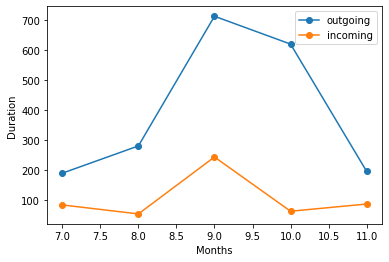

In [12]:
plt.plot(dff['outgoing_duration'],label = 'outgoing',marker = 'o')
plt.plot(dff['incoming_duration'],label='incoming',marker = 'o')
plt.xlabel('Months')
plt.ylabel('Duration')
plt.legend()

3.  Do you see anything unusual in the pattern?  E.g.  does this look like a phone line thatwas used for criminal activities or more like a personal phone?

**Answer: Yes the plot shows an unusual pattern in terms of the phone usage. There is a significant disparity in the number of outgoing and incoming calls. It is highly probable that this phone would have been used for criminal activities like phishing.**

**1.6  Distribution of calls**

Plot the histogram of the outbound call counts;  e.g.  x-axis:  the call counts per client called, y-axis:  number of clients called.

Text(0, 0.5, 'Number of clients called')

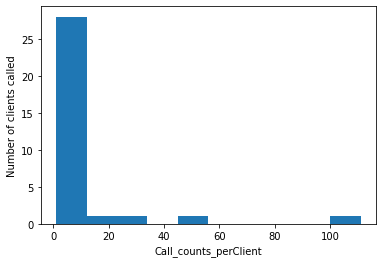

In [41]:
plt.hist(df_maxNum)
plt.xlabel('Call_counts_perClient')
plt.ylabel('Number of clients called')

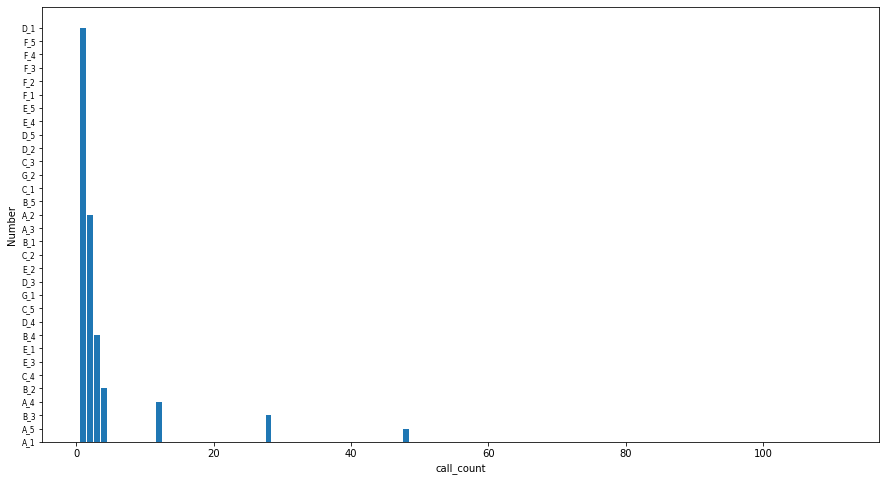

In [45]:
plt.figure(figsize=(15,8))
plt.bar(df_value_counts_reset['Max_Count'],df_value_counts_reset['Number'])
plt.xlabel('call_count')
plt.ylabel('Number')
plt.tick_params(axis='y', which='major', labelsize=7.5)
plt.show()

**2.  The ergodicity problem in economics**

2.3  Coding the problemBelow is a description of a simple set of steps you can follow to code this problem.  It is notoptimal for computation, but it is simple to understand the steps.  If you want to follow adifferent logic1.  Generate a pandas dataframe that simulatesNcoin tosses forwgamblers with thenp.random.rand function.  SetN=100 coin tosses andw=100 gamblers and add theprefix ’prob’ to the column name.

1.  Generate a pandas dataframe that simulates Ncoin tosses for w gamblers with the np.random.rand function.  SetN=100 coin tosses and w=100 gamblers and add the prefix ’prob’ to the column name.

In [15]:
N = 100
w = 100
df_1 = pd.DataFrame(np.random.rand(N,w))
df_1 = df_1.add_prefix('prob_')

In [16]:
column_df = ['balance_'+str(x) for x in range(0,w)]
data = 100*np.ones((100,100))
df_w = pd.DataFrame(data,columns=column_df)
df = pd.concat([df_1,df_w],axis=1)
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20,prob_21,prob_22,prob_23,prob_24,prob_25,prob_26,prob_27,prob_28,prob_29,prob_30,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,...,balance_60,balance_61,balance_62,balance_63,balance_64,balance_65,balance_66,balance_67,balance_68,balance_69,balance_70,balance_71,balance_72,balance_73,balance_74,balance_75,balance_76,balance_77,balance_78,balance_79,balance_80,balance_81,balance_82,balance_83,balance_84,balance_85,balance_86,balance_87,balance_88,balance_89,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.857548,0.906307,0.375642,0.758010,0.275995,0.260461,0.411378,0.836670,0.929929,0.393690,0.993053,0.635399,0.949491,0.968259,0.502088,0.853324,0.338581,0.755698,0.314381,0.565342,0.739248,0.969019,0.327975,0.957000,0.596651,0.222252,0.463372,0.814961,0.655652,0.169177,0.964926,0.299640,0.333470,0.563347,0.209999,0.834354,0.344489,0.726388,0.394564,0.167221,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.980897,0.995389,0.898857,0.906943,0.375974,0.769133,0.166998,0.975723,0.838357,0.106967,0.416774,0.086134,0.029674,0.621125,0.171563,0.863850,0.724229,0.082695,0.732646,0.945020,0.578933,0.394317,0.945343,0.761162,0.710379,0.019923,0.272810,0.481629,0.183352,0.376475,0.658067,0.086845,0.922836,0.595004,0.590394,0.974051,0.593349,0.827261,0.134801,0.388716,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.677737,0.429454,0.867915,0.951010,0.264370,0.354975,0.681468,0.024155,0.684761,0.983648,0.645334,0.097735,0.611465,0.341530,0.799170,0.426565,0.630105,0.851536,0.089393,0.944309,0.985089,0.110765,0.657107,0.389161,0.783655,0.521145,0.061753,0.382326,0.961656,0.561421,0.441910,0.731539,0.779287,0.562160,0.786392,0.065824,0.950313,0.386303,0.605615,0.120335,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.399919,0.836254,0.960812,0.564118,0.642738,0.458329,0.165541,0.864450,0.040081,0.656369,0.966877,0.417178,0.957855,0.913431,0.444439,0.388929,0.240594,0.417682,0.653968,0.601737,0.650872,0.850553,0.151445,0.615477,0.356613,0.338609,0.044579,0.852116,0.089116,0.485416,0.360755,0.440551,0.509179,0.527845,0.787084,0.535690,0.896329,0.183166,0.508953,0.028770,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.475517,0.067124,0.817711,0.985774,0.810046,0.506764,0.112188,0.910954,0.793470,0.828189,0.450695,0.034886,0.137902,0.779574,0.941697,0.204549,0.771417,0.528042,0.921397,0.709889,0.293718,0.554058,0.125229,0.247509,0.038391,0.050446,0.006626,0.111481,0.976390,0.398658,0.736905,0.863067,0.390739,0.937475,0.384160,0.640347,0.071156,0.356953,0.031840,0.928756,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

2.  Initialize an additional w columns [’balance’ + str(x)] with the value 100 to capture the initial wealth of 100$, where:  x in range(0, w).

In [17]:
column_df = []
for x in range(w):
  column_df.append('balance_'+str(x))
data = 100*np.ones((100,100))
df_er = pd.DataFrame(data = data,columns=column_df)

In [18]:
df = pd.concat([df_1,df_er],axis=1)
df


,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20,prob_21,prob_22,prob_23,prob_24,prob_25,prob_26,prob_27,prob_28,prob_29,prob_30,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,...,balance_60,balance_61,balance_62,balance_63,balance_64,balance_65,balance_66,balance_67,balance_68,balance_69,balance_70,balance_71,balance_72,balance_73,balance_74,balance_75,balance_76,balance_77,balance_78,balance_79,balance_80,balance_81,balance_82,balance_83,balance_84,balance_85,balance_86,balance_87,balance_88,balance_89,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.857548,0.906307,0.375642,0.758010,0.275995,0.260461,0.411378,0.836670,0.929929,0.393690,0.993053,0.635399,0.949491,0.968259,0.502088,0.853324,0.338581,0.755698,0.314381,0.565342,0.739248,0.969019,0.327975,0.957000,0.596651,0.222252,0.463372,0.814961,0.655652,0.169177,0.964926,0.299640,0.333470,0.563347,0.209999,0.834354,0.344489,0.726388,0.394564,0.167221,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.980897,0.995389,0.898857,0.906943,0.375974,0.769133,0.166998,0.975723,0.838357,0.106967,0.416774,0.086134,0.029674,0.621125,0.171563,0.863850,0.724229,0.082695,0.732646,0.945020,0.578933,0.394317,0.945343,0.761162,0.710379,0.019923,0.272810,0.481629,0.183352,0.376475,0.658067,0.086845,0.922836,0.595004,0.590394,0.974051,0.593349,0.827261,0.134801,0.388716,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.677737,0.429454,0.867915,0.951010,0.264370,0.354975,0.681468,0.024155,0.684761,0.983648,0.645334,0.097735,0.611465,0.341530,0.799170,0.426565,0.630105,0.851536,0.089393,0.944309,0.985089,0.110765,0.657107,0.389161,0.783655,0.521145,0.061753,0.382326,0.961656,0.561421,0.441910,0.731539,0.779287,0.562160,0.786392,0.065824,0.950313,0.386303,0.605615,0.120335,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.399919,0.836254,0.960812,0.564118,0.642738,0.458329,0.165541,0.864450,0.040081,0.656369,0.966877,0.417178,0.957855,0.913431,0.444439,0.388929,0.240594,0.417682,0.653968,0.601737,0.650872,0.850553,0.151445,0.615477,0.356613,0.338609,0.044579,0.852116,0.089116,0.485416,0.360755,0.440551,0.509179,0.527845,0.787084,0.535690,0.896329,0.183166,0.508953,0.028770,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.475517,0.067124,0.817711,0.985774,0.810046,0.506764,0.112188,0.910954,0.793470,0.828189,0.450695,0.034886,0.137902,0.779574,0.941697,0.204549,0.771417,0.528042,0.921397,0.709889,0.293718,0.554058,0.125229,0.247509,0.038391,0.050446,0.006626,0.111481,0.976390,0.398658,0.736905,0.863067,0.390739,0.937475,0.384160,0.640347,0.071156,0.356953,0.031840,0.928756,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

3.  Create a two-level for loop that iterates through rows 1 to N first and columns w to 2×w next implementing the calculation logic for every prob-balance pair:
Balancei= 
          {1.5×Balancei−1,if probi−1≥0.5 
          {0.6×Balancei−1,if probi−1<0.5

In [24]:
for i in range(0,N-1):
  for j in range(w,2*w):
    if df.iloc[i,j-100] >= 0.5:
      df.iloc[i+1,j] = 1.5 * df.iloc[i,j]
    else:
      df.iloc[i+1,j] = 0.6 * df.iloc[i,j]


4.  Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculatehow  many  gamblers  havemorethan  their  initial  100$.   
What  happens  when  youincreaseNto 1,000 (Figure 2 in the original paper, except the red and blue line)?  Howmany gamblers with more than 100$do you have at t=1,000?

In [25]:
df.head()

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,prob_10,prob_11,prob_12,prob_13,prob_14,prob_15,prob_16,prob_17,prob_18,prob_19,prob_20,prob_21,prob_22,prob_23,prob_24,prob_25,prob_26,prob_27,prob_28,prob_29,prob_30,prob_31,prob_32,prob_33,prob_34,prob_35,prob_36,prob_37,prob_38,prob_39,...,balance_60,balance_61,balance_62,balance_63,balance_64,balance_65,balance_66,balance_67,balance_68,balance_69,balance_70,balance_71,balance_72,balance_73,balance_74,balance_75,balance_76,balance_77,balance_78,balance_79,balance_80,balance_81,balance_82,balance_83,balance_84,balance_85,balance_86,balance_87,balance_88,balance_89,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.857548,0.906307,0.375642,0.758010,0.275995,0.260461,0.411378,0.836670,0.929929,0.393690,0.993053,0.635399,0.949491,0.968259,0.502088,0.853324,0.338581,0.755698,0.314381,0.565342,0.739248,0.969019,0.327975,0.957000,0.596651,0.222252,0.463372,0.814961,0.655652,0.169177,0.964926,0.299640,0.333470,0.563347,0.209999,0.834354,0.344489,0.726388,0.394564,0.167221,...,36.0000,36.000,36.000,36.0,225.000,36.00,225.00,225.00,36.00,36.000,36.000,36.000,225.00,225.0000,225.000,36.000,36.0,225.0000,36.0000,225.00,225.00,36.000,225.000,225.0000,225.00,36.000,36.0000,225.000,36.000,225.0000,36.00,36.00,36.0,36.000,36.000,36.000,36.0000,225.00,225.0000,36.00
1,0.980897,0.995389,0.898857,0.906943,0.375974,0.769133,0.166998,0.975723,0.838357,0.106967,0.416774,0.086134,0.029674,0.621125,0.171563,0.863850,0.724229,0.082695,0.732646,0.945020,0.578933,0.394317,0.945343,0.761162,0.710379,0.019923,0.272810,0.481629,0.183352,0.376475,0.658067,0.086845,0.922836,0.595004,0.590394,0.974051,0.593349,0.827261,0.134801,0.388716,...,21.6000,21.600,21.600,21.6,337.500,21.60,337.50,337.50,21.60,21.600,21.600,21.600,337.50,337.5000,337.500,21.600,21.6,337.5000,21.6000,337.50,337.50,21.600,337.500,337.5000,337.50,21.600,21.6000,337.500,21.600,337.5000,21.60,21.60,21.6,21.600,21.600,21.600,21.6000,337.50,337.5000,21.60
2,0.677737,0.429454,0.867915,0.951010,0.264370,0.354975,0.681468,0.024155,0.684761,0.983648,0.645334,0.097735,0.611465,0.341530,0.799170,0.426565,0.630105,0.851536,0.089393,0.944309,0.985089,0.110765,0.657107,0.389161,0.783655,0.521145,0.061753,0.382326,0.961656,0.561421,0.441910,0.731539,0.779287,0.562160,0.786392,0.065824,0.950313,0.386303,0.605615,0.120335,...,12.9600,32.400,12.960,32.4,202.500,12.96,202.50,202.50,32.40,32.400,32.400,12.960,202.50,506.2500,506.250,32.400,32.4,506.2500,12.9600,506.25,202.50,32.400,202.500,506.2500,506.25,12.960,12.9600,202.500,12.960,506.2500,32.40,12.96,32.4,12.960,12.960,32.400,12.9600,506.25,506.2500,12.96
3,0.399919,0.836254,0.960812,0.564118,0.642738,0.458329,0.165541,0.864450,0.040081,0.656369,0.966877,0.417178,0.957855,0.913431,0.444439,0.388929,0.240594,0.417682,0.653968,0.601737,0.650872,0.850553,0.151445,0.615477,0.356613,0.338609,0.044579,0.852116,0.089116,0.485416,0.360755,0.440551,0.509179,0.527845,0.787084,0.535690,0.896329,0.183166,0.508953,0.028770,...,7.7760,19.440,19.440,48.6,303.750,19.44,303.75,303.75,48.60,19.440,19.440,7.776,121.50,759.3750,759.375,19.440,48.6,759.3750,7.7760,303.75,303.75,19.440,303.750,759.3750,303.75,7.776,7.7760,303.750,7.776,759.3750,19.44,19.44,48.6,19.440,7.776,19.440,7.7760,303.75,759.3750,19.44
4,0.475517,0.067124,0.817711,0.985774,0.810046,0.506764,0.112188,0.910954,0.793470,0.828189,0.450695,0.034886,0.137902,0.779574,0.941697,0.204549,0.771417,0.528042,0.921397,0.709889,0.293718,0.554058,0.125229,0.247509,0.038391,0.050446,0.006626,0.111481,0.976390,0.398658,0.736905,0.863067,0.390739,0.937475,0.384160,0.640347,0.071156,0.356953,0.031840,0.928756,...,4.6656,11.664,11.664,72.9,455.625,29.16,182.25,182.25,29.16,11.664,11.664,11.664,182.25,1139.0625,455.625,11.664,72.9,1139.0625,4.6656,182.25,182.25,11.664,455.625,1139.0625,182.25,11.664,4.6656,455.625,11.664,1139.0625,29.16,29.16,72.9,11.664,11.664,11.664,4.6656,182.25,113

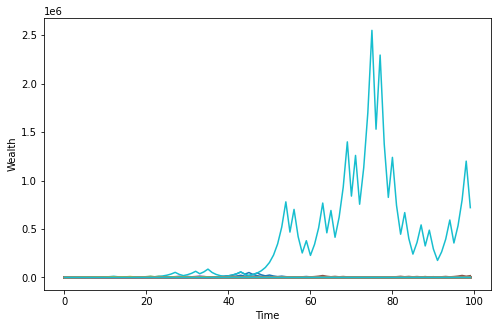

Gamblers wealth more than 100 dollars : 10


In [26]:
count = 0
plt.figure(figsize=(8,5))
for i in range(100,200):
  balance = df.iloc[-1,i]
  if balance > 100:
    count += 1

for i in range(100,200):
  plt.plot(df.index,df.iloc[:,i])
  plt.xlabel('Time')
  plt.ylabel('Wealth')
  
plt.show()
print('Gamblers wealth more than 100 dollars : {}'.format(count))


When N = 1000:

In [27]:
np.random.seed(22)
w_, N_ = 100,1000 
df_2 = pd.DataFrame(np.random.rand(N_,w_))
df_2 = df.add_prefix('prob_')
column_df = []
for x in range(w_):
  column_df.append('balance_'+str(x))
data = 100*np.ones((N_,w_))
df_er = pd.DataFrame(data = data,columns=column_df)
df_ = pd.concat([df_2,df_er],axis=1)
for i in range(0,N_-1):
  for j in range(w_,2*w_):
    if df_.iloc[i,j-100] >= 0.5:
      df_.iloc[i+1,j] = 1.5 * df_.iloc[i,j]
    else:
      df_.iloc[i+1,j] = 0.6 * df_.iloc[i,j]

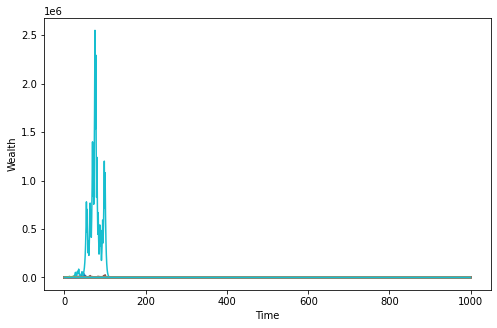

Gamblers that have wealth more than 100 dollars : 0


In [28]:
counter = 0
plt.figure(figsize=(8,5))
for i in range(100,200):
  balance = df_.iloc[-1,i]
  if balance > 100:
    counter += 1
for i in range(100,200):
  plt.plot(df_.index,df_.iloc[:,i])
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.show()
print('Gamblers that have wealth more than 100 dollars : {}'.format(counter))

At t= 1000 we have 0 gamblers with more than a hundred dollars.

**When n=1000 the probabilty of gamblers losing wealth increases**

5.  Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000.  Try both linear and logarithmic scaler for the wealth axis.  What are your observations?



In [29]:
mean = pd.DataFrame()
mean["mean"] = df.iloc[:,w:2*w].mean(axis=1)
mean["median"] = df.iloc[:,w:2*w].median(axis=1)


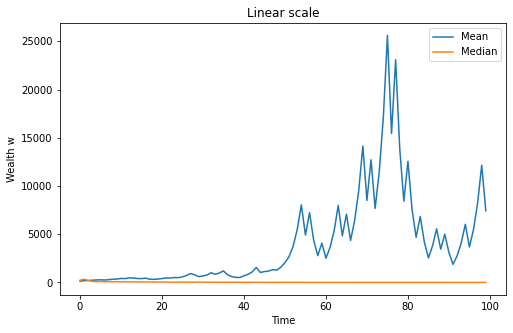

In [30]:
plt.figure(figsize=(8,5))
plt.plot(mean.index,mean['mean'])
plt.plot(mean.index,mean['median'])
plt.legend(["Mean","Median"],loc="best")
plt.xlabel("Time")
plt.ylabel("Wealth w")
plt.title("Linear scale")
plt.show()

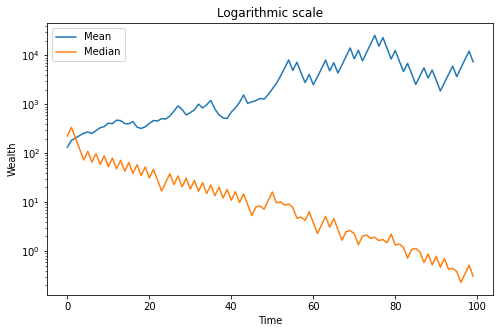

In [31]:
plt.figure(figsize=((8,5)))
plt.plot(mean.index,mean['mean'])
plt.plot(mean.index,mean['median'])
plt.xlabel("Time")
plt.ylabel("Wealth")
plt.yscale("log")
plt.legend(["Mean","Median"],loc="best")
plt.title("Logarithmic scale")
plt.show()

**Observation: The plot shows that the mean value of wealth increases until a certain point and then start to decrease gradually after reaching its peak value. There is fluctuation in the wealth as the logic of calculation is dependant upon the balance of each gambler thus as the wealth increases the amount lost also increases.**

6.  Repeat steps 3-5 with N=10 and w=1,000 with the following logic:
Balancei={Balance i−1+ 50,if prob i−1≥0.5 Balancei−1−40,if probi−1<0.5
How are the results different than the previous logic?

When N = 10, w = 1000

In [32]:
np.random.seed(22)
w, N = 1000,10 
df = pd.DataFrame(np.random.rand(N,w))
df = df.add_prefix('prob_')
column_df = []
for x in range(w):
  column_df.append('balance_'+str(x))
data = 100*np.ones((N,w))
df_e = pd.DataFrame(data = data,columns=column_df)
df = pd.concat([df,df_e],axis=1)
for i in range(0,N-1):
  for j in range(w,2*w):
    if df.iloc[i,j-1000] >= 0.5:
      df.iloc[i+1,j] = 50 + df.iloc[i,j]
    else:
      df.iloc[i+1,j] = df.iloc[i,j] - 40

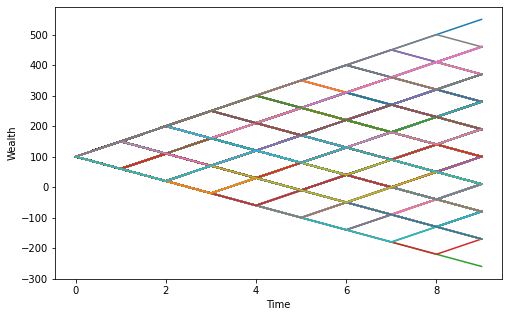

Players that have wealth more than 100 dollars : 515


In [34]:
counter_2_6 = 0
plt.figure(figsize=(8,5))
for i in range(1000,2000):
  balance = df.iloc[-1,i]
  if balance > 100:
    counter_2_6 += 1
plt.plot(df.index,df.iloc[:,w:2*w])
plt.xlabel('Time')
plt.ylabel('Wealth')

plt.show()
print('Players that have wealth more than 100 dollars : {}'.format(counter_2_6))

When N,w = 1000

In [35]:
np.random.seed(22)
w, N = 1000,1000
df_4 = pd.DataFrame(np.random.rand(N,w))
df_4 = df_4.add_prefix('prob_')
column_df = []
for x in range(w):
  column_df.append('balance_'+str(x))
data = 100*np.ones((1000,1000))
df_er = pd.DataFrame(data = data,columns=column_df)
df = pd.concat([df_4,df_er],axis=1)
for i in range(0,N-1):
  for j in range(w,2*w):
    if df.iloc[i,j-1000] >= 0.5:
      df.iloc[i+1,j] = 50 + df.iloc[i,j]
    else:
      df.iloc[i+1,j] = df.iloc[i,j] - 40

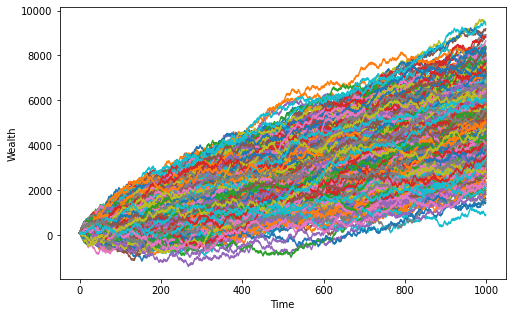

Players that have wealth more than 100 dollars : 1000


In [36]:
count = 0
plt.figure(figsize=(8,5))
for i in range(1000,2000):
  balance = df.iloc[-1,i]
  if balance > 100:
    count += 1
plt.plot(df.index,df.iloc[:,w:2*w])
plt.xlabel('Time')
plt.ylabel('Wealth')
plt.show()
print('Players that have wealth more than 100 dollars : {}'.format(count))

**When n=1000 the probabilty of gamblers losing wealth increases**

Mean-median plot

In [38]:
mean_2 = pd.DataFrame()
mean_2["mean"] = df.iloc[:,w:2*w].mean(axis=1)
mean_2["median"] = df.iloc[:,w:2*w].median(axis=1)


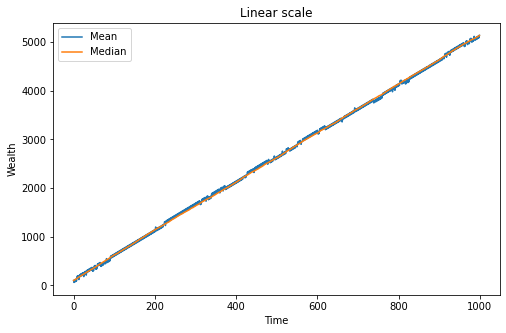

In [39]:
plt.figure(figsize=(8,5))
plt.plot(mean_2.index,mean_2['median'])
plt.plot(mean_2.index,mean_2['mean'])
plt.xlabel("Time")
plt.ylabel("Wealth")
plt.legend(["Mean","Median"],loc="best")
plt.title("Linear scale")
plt.show()

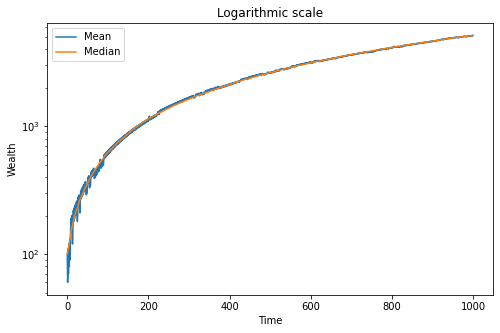

In [40]:
plt.figure(figsize=(8,5))
plt.plot(mean_2.index,mean_2['median'])
plt.plot(mean_2.index,mean_2['mean'])
plt.xlabel("Time")
plt.ylabel("Wealth")
plt.yscale("log")
plt.legend(["Mean","Median"],loc="best")
plt.title("Logarithmic scale")
plt.show()

**Observation: From the plot mean and median we observe that the difference between the mean and median of the data points is minimal and they follow the same trajectory i.e we can observe a linear incerease in the wealth with time.As we only deduct a certain amount irrespective of the wealth.**

**In the previous logic the number of gamblers that had more than 100 dollars was very less whereas, after changing the logic to calculate the prob-balance pair the number of gamblers that had more than 100 dollars at time t = 10 was about 515 and the the probabilty of gamblers having more than 100 dollars at time 1000 and w 1000 increased to 1000. The major reason is that the in the previous logic the amount calculated is directly dependant upon wealth while in this logic we are deducting only a certain dollars irrespective of the wealth.**